In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd

# rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})
# rc('text', usetex=True)

sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid' : False, 'grid.linestyle': '--', 'grid.color':'black'})
sns.set_palette("bright")

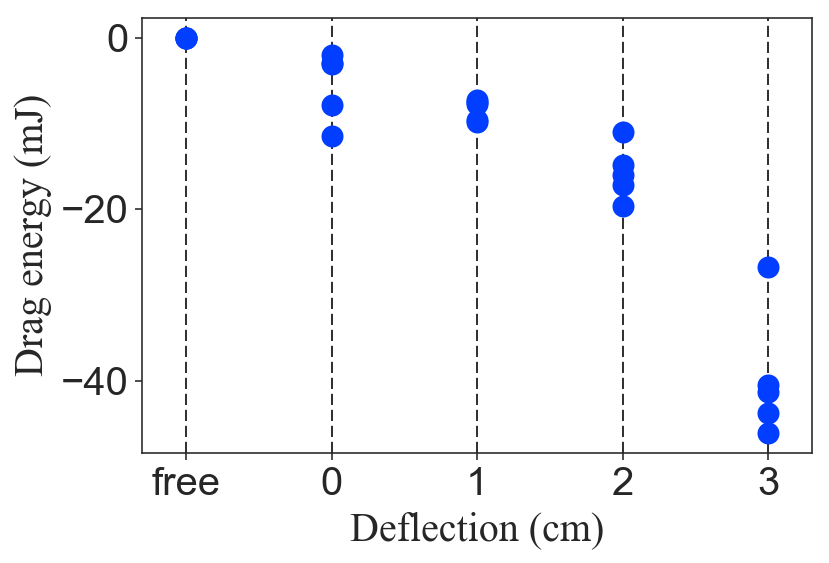

In [13]:
# import plotly.plotly as py
# import plotly.tools as tls

# figure, axarr = plt.subplots(1) 

#Drag Energy Values Per Experiment
#[4,6,8,10,14]cms
#These are in milli Joules!!!!!
# y = [[43.7517281399,40.5095916734,46.0396065548,41.3447699641,26.7173180728],
#      [16.0091360348,17.1934198813,19.6689776828,10.963293453,14.7849611848],
#      [7.67721674383,9.54039749662,7.53230578126,7.31788106526,9.78851015352],
#      [1.9878490957,7.79337248744,2.89737072701,11.512361768,3.09771914392],
#      [0.000544984373971,0.0218416287489,0.0171017898361,0.0171689905565]]
# invert the order according to the order in the plot.
y=[[0.000544984373971,0.0218416287489,0.0171017898361,0.0171689905565],
  [1.9878490957,7.79337248744,2.89737072701,11.512361768,3.09771914392],
  [7.67721674383,9.54039749662,7.53230578126,7.31788106526,9.78851015352],
  [16.0091360348,17.1934198813,19.6689776828,10.963293453,14.7849611848],
  [43.7517281399,40.5095916734,46.0396065548,41.3447699641,26.7173180728]]
# map y (drag) values to negative so it conforms with the 
# physical interpretation
y=[[-0.000544984373971,-0.0218416287489,-0.0171017898361,-0.0171689905565],
  [-1.9878490957,-7.79337248744,-2.89737072701,-11.512361768,-3.09771914392],
  [-7.67721674383,-9.54039749662,-7.53230578126,-7.31788106526,-9.78851015352],
  [-16.0091360348,-17.1934198813,-19.6689776828,-10.963293453,-14.7849611848],
  [-43.7517281399,-40.5095916734,-46.0396065548,-41.3447699641,-26.7173180728]]

#here are old drag energy values for free channel, delete after done..
# [2.54731008612,1.52608656469,2.78558680355,1.42638075052,3.23267274691]
# x = [[4]*5,[6]*5,[8]*5,[10]*5, [14]*4]
x = [[-1]*4,[0]*5,[1]*5,[2]*5,[3]*5]
# my_xticks = ["4","6","8","10","14"]
my_xticks=["free","0","1", "2", "3"]
y = reduce(lambda a,b: a+b, y)
x = reduce(lambda a,b: a+b, x)
# print my_xticks
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y,s=100)
# ax.set_xticks((4,6,8,10,12))
ax.set_xticks((-1,0,1,2,3))
ax.set_xticklabels(my_xticks)

# ax.ylabel('Drag Energy (mJ)')
# ax.xlabel('Channel Width (cm)')
# ax.spines['left'].set_position('zero')
ax.set_xlim(xmin=-1.3, xmax=3.3)
# ax.set_ylim(ymax=7)
ax.xaxis.grid(True)
fig.set_size_inches((6,4))
xfont = {'fontname':'Times New Roman'}
ax.set_xlabel("Deflection (cm)",fontdict=xfont, fontsize=20)
ax.set_ylabel("Drag energy (mJ)",fontdict=xfont,fontsize=20)
ax.tick_params(axis='both', which='both', labelsize=20)
fig.savefig("top_shell_drag.jpg", dpi=450, bbox_inches='tight')
# fig.set_size_inches(,)
plt.show()
# ax.show()

In [14]:
y2=[[-0.000544984373971,-0.0218416287489,-0.0171017898361,-0.0171689905565],
  [-1.9878490957,-7.79337248744,-2.89737072701,-11.512361768,-3.09771914392],
  [-7.67721674383,-9.54039749662,-7.53230578126,-7.31788106526,-9.78851015352],
  [-16.0091360348,-17.1934198813,-19.6689776828,-10.963293453,-14.7849611848],
  [-43.7517281399,-40.5095916734,-46.0396065548,-41.3447699641,-26.7173180728]]
y2_index_map = ["free", "0", "1", "2", "3"]

df = pd.DataFrame(columns=["Deflection", "Value"])

i = 0
for j in xrange(len(y2)):
    for v in y2[j]:
        df.loc[i] = [y2_index_map[j], v]
        i += 1

df["Value"] = pd.to_numeric(df["Value"])

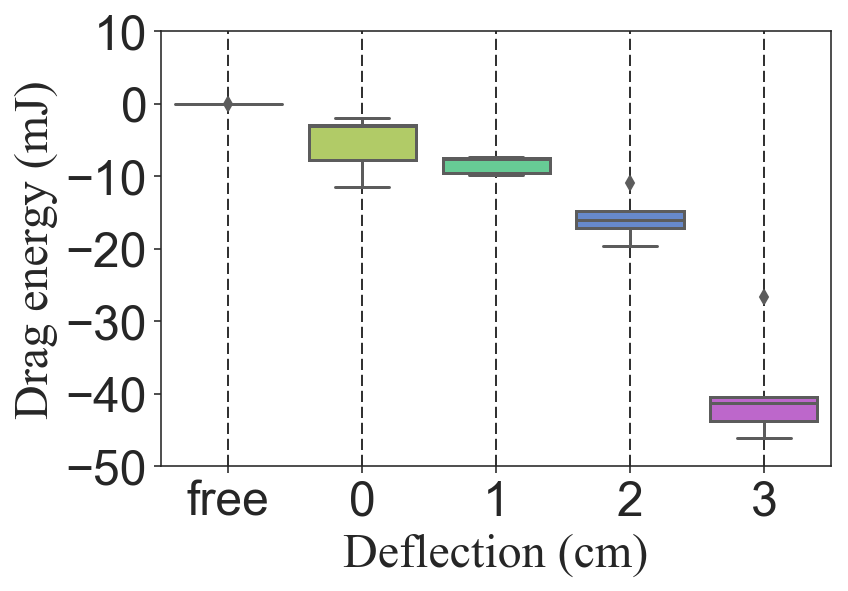

In [16]:
xfont = {'fontname':'Times New Roman'}
ax = sns.boxplot(x="Deflection", y="Value", data=df, palette="hls")
ax.tick_params(axis='both', which='both', labelsize=24)
ax.set_ylabel("Drag energy (mJ)",fontdict=xfont, fontsize=24)
ax.set_xlabel("Deflection (cm)",fontdict=xfont,fontsize=24)
ax.xaxis.grid(True)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(-50, end + 10, 10))